<a href="https://colab.research.google.com/github/purvasingh96/Deep-learning-with-neural-networks/blob/master/Chapter-wise%20code/Code%20-%20PyTorch/2.%20Convolution%20Neural%20Networks/3.%20Object%20Detection/frontal_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Downloading



In [0]:
import os
from pathlib import Path
os.chdir(Path('./sample_data'))
print(os.getcwd())
!wget -N https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip


In [0]:
!wget -N https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

In [0]:
from zipfile import ZipFile
import os
print(os.getcwd())
zf = ZipFile('dogImages.zip', 'r')
zf.extractall('./')
zf.close()

In [0]:
from zipfile import ZipFile
import os
print(os.getcwd())
zf = ZipFile('lfw.zip', 'r')
zf.extractall('./')
zf.close()

# Detecting Human Faces
OpenCV provides many pre-trained face detectors, stored as XML files on github. We have downloaded one of these detectors and stored it in the haarcascades directory. In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [0]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("./lfw/*/*"))
dog_files = np.array(glob("./dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [29]:
!wget -N https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_alt.xml

--2020-05-17 02:53:23--  https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_alt.xml
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘haarcascade_frontalface_alt.xml’

haarcascade_frontal     [  <=>               ]   6.02M  26.7MB/s    in 0.2s    

Last-modified header missing -- time-stamps turned off.
2020-05-17 02:53:24 (26.7 MB/s) - ‘haarcascade_frontalface_alt.xml’ saved [6315421]



Number of faces detected :  1


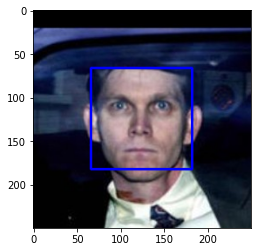

In [37]:
# extract pre-trained face classifier
import os
from pathlib import Path
base_dir  = os.getcwd()
path_to_face_detector = os.path.join(base_dir, Path('./haarcascades/haarcascade_frontalface_alt.xml'))
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# extract colored (BRG) image
img = cv2.imread(human_files[3])

# convert colored to gray-scale images
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in images
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected
print('Number of faces detected : ', len(faces))


# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()
